Importo las librerías necesarias para mi proyecto. Además de pandas, seaborn y matplotlib para elaborar las gráficas, son necesarias las de datetime y holidays para editar las columnas con fecha y días. Por otro lado, también hay que importar folium para la visualización de mapas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import holidays
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import folium

Cargo los datos a partir del csv de la [web de crímenes de Los Ángeles](https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data). Como es un archivo pesado con más de 1.000.000 filas, subiré a GitHub sólo parte de él para tener una idea global de lo que contiene.

In [2]:
df_original = pd.read_csv('C:/Users/AnaGu/Downloads/Crime_Data_from_2020_to_Present.csv')
df_original.info

<bound method DataFrame.info of              DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        211507896  04/11/2021 12:00:00 AM  11/07/2020 12:00:00 AM       845   
1        201516622  10/21/2020 12:00:00 AM  10/18/2020 12:00:00 AM      1845   
2        240913563  12/10/2024 12:00:00 AM  10/30/2020 12:00:00 AM      1240   
3        210704711  12/24/2020 12:00:00 AM  12/24/2020 12:00:00 AM      1310   
4        201418201  10/03/2020 12:00:00 AM  09/29/2020 12:00:00 AM      1830   
...            ...                     ...                     ...       ...   
1004984  252104112  02/02/2025 12:00:00 AM  02/02/2025 12:00:00 AM       130   
1004985  250404100  02/18/2025 12:00:00 AM  02/18/2025 12:00:00 AM      1000   
1004986  251304095  01/31/2025 12:00:00 AM  01/30/2025 12:00:00 AM      1554   
1004987  251704066  01/17/2025 12:00:00 AM  01/17/2025 12:00:00 AM      1600   
1004988  251904210  03/25/2025 12:00:00 AM  03/25/2025 12:00:00 AM      1235   

       

Antes de continuar voy a crear el dataframe de ejemplo para subirlo a GitHub, ya que el archivo original es muy pesado. Lo llamaré "df_ejemplo".

In [3]:
df_ejemplo = df_original.copy()
df_ejemplo = df_ejemplo.head(1000)
df_ejemplo.to_csv('df_ejemplo.csv')

Visualizo la tabla de crímenes en crudo y sin modificar para ver qué columnas tiene y cuáles me interesan.

In [4]:
df_original

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004984,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004985,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004986,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004987,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


Imprimo por pantalla los nombres de todas las columnas para saber su nombre exacto y poder copiar y pegarlos en la próxima casilla de elección de columnas para mi nuevo dataframe.

In [5]:
df_original.columns.tolist()

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON']

Podría eliminar algunas columnas que no me interesan, como 'DR_NO' que es el número de caso y el código de arma 'Crm Cd Desc', pero mejor hago una copia del dataframe original y me quedo con las columnas que me interesa trabajar.

In [6]:
df = df_original.copy()
df = df[['DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'LAT', 'LON']]
df

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LAT,LON
0,11/07/2020 12:00:00 AM,845,N Hollywood,THEFT OF IDENTITY,31,M,H,SINGLE FAMILY DWELLING,NaN,34.2124,-118.4092
1,10/18/2020 12:00:00 AM,1845,N Hollywood,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",32,M,H,SIDEWALK,KNIFE WITH BLADE 6INCHES OR LESS,34.1993,-118.4203
2,10/30/2020 12:00:00 AM,1240,Van Nuys,THEFT OF IDENTITY,30,M,W,SINGLE FAMILY DWELLING,NaN,34.1847,-118.4509
3,12/24/2020 12:00:00 AM,1310,Wilshire,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,47,F,A,STREET,NaN,34.0339,-118.3747
4,09/29/2020 12:00:00 AM,1830,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),63,M,H,ALLEY,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...
1004984,02/02/2025 12:00:00 AM,130,Topanga,OTHER MISCELLANEOUS CRIME,35,M,X,STREET,NaN,34.2259,-118.6126
1004985,02/18/2025 12:00:00 AM,1000,Hollenbeck,CHILD NEGLECT (SEE 300 W.I.C.),11,M,B,SINGLE FAMILY DWELLING,NaN,34.0277,-118.1979
1004986,01/30/2025 12:00:00 AM,1554,Newton,INDECENT EXPOSURE,16,F,H,STREET,NaN,33.9942,-118.2701
1004987,01/17/2025 12:00:00 AM,1600,Devonshire,BATTERY - SIMPLE ASSAULT,17,M,H,HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.2450,-118.5233


Tendré que ir revisando los datos de cada columna para saber si hay NaN o valores erróneos ya que me interfieren en el resultado de los datos o me da errores.

Voy a calcular el porcentaje de NaN por columna por si tengo que modificarlas.

In [7]:
nan = df.isnull().sum()
rows = len(df)
nan_percentage = (nan / rows) * 100
nan_percentage

DATE OCC         0.000000
TIME OCC         0.000000
AREA NAME        0.000000
Crm Cd Desc      0.000000
Vict Age         0.000000
Vict Sex        14.392595
Vict Descent    14.393789
Premis Desc      0.058508
Weapon Desc     67.437753
LAT              0.000000
LON              0.000000
dtype: float64

1. No me importa demasiado los NaN de 'Vict Sex' ni de 'Vict Descent', ya que voy s sustituirlos por 'X' = unknown.  

2. En el caso de 'Premis Desc', sustituyo los NaN por la moda. 

3. Para 'Weapon Desc', como tengo el 67% de NaN eliminaré la columna al completo. No puedo afirmar si realmente el arma más utilizada es 'STRONG-ARM' por ser la más alta aunque pensemos que podría ser lo más probable.

Luego compruebo que haya salido correctamente.

In [8]:
df['Vict Sex'] = df['Vict Sex'].fillna('X')
df['Vict Descent'] = df['Vict Descent'].fillna('X')

df['Premis Desc'] = df['Premis Desc'].fillna(df['Premis Desc'].mode()[0])

df = df.drop('Weapon Desc', axis = 1)

nan = df.isnull().sum()
rows = len(df)
nan_percentage = (nan / rows) * 100
nan_percentage

DATE OCC        0.0
TIME OCC        0.0
AREA NAME       0.0
Crm Cd Desc     0.0
Vict Age        0.0
Vict Sex        0.0
Vict Descent    0.0
Premis Desc     0.0
LAT             0.0
LON             0.0
dtype: float64

Voy a mirar los valores que hay en cada columna para comprobar si hay algún dato erróneo y corregirlo.  
Las columnas que tienen valores correctos son:
- DATE OCC: quiero quedarme con el mes, el año y conocer el día de la semana
- TIME OCC: tengo que pasarlo de str a time
- AREA NAME
- Crm Cd Desc
- LOCATION
- LAT
- LON

Igualmente, tendré que convertir esos valores pero lo haré más tarde.

La columna 'Vict Age' la convierto antes de str a int para trabajar con los números.  

In [9]:
df['Vict Age'] = df['Vict Age'].astype(int)

Veo que tiene valores anómalos, como edades negativas, 0 años o 120 años. Las edades negativas y excesivas como 120 años puedo solucionarlo cambiándolas por la moda, ya que son pocos casos. El problema es qué hacer con los 269221 que tienen valor '0' de edad.

In [10]:
df['Vict Age'].value_counts()

Vict Age
 0      269221
 30      22289
 35      21836
 31      21420
 29      21345
         ...  
 98         71
-2          28
-3           6
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [11]:
df['Vict Age'].mode()

0    0
Name: Vict Age, dtype: int64

Finalmente, voy a reemplazar todas las edades no deseadas por la moda, que en este caso no sería la edad 0 sino la siguiente que tomo de la lista, es decir, 30 años.

In [12]:
df['Vict Age'] = df['Vict Age'].replace([-1, -2, -3, -4, 0, 120], 30)
df['Vict Age'].value_counts()

Vict Age
30    291648
35     21836
31     21420
29     21345
28     20969
       ...  
94       105
95       100
96        94
97        72
98        71
Name: count, Length: 98, dtype: int64

Ya podemos comprobar que la moda es 30 años y el código se hizo correctamente.

In [13]:
df['Vict Age'].mode()

0    30
Name: Vict Age, dtype: int64

Ahora voy a comprobar la columna del sexo de la víctima.  

Primero veo los valores de 'Vict Descent' y me aseguro que sólo sean:  

| Valor | Descripción |
| ---------------- | ----------- |
| M       | male |
| F       | female |
| X       | unknown |

Si hay otro distinto, lo pondré como 'X' al no saber qué sexo es.

In [14]:
df['Vict Sex'].value_counts()

Vict Sex
M    403879
F    358579
X    242416
H       114
-         1
Name: count, dtype: int64

Veo cuántos valores he de pasar a 'X', que son las 'H' y '-'. Serían 115.

In [15]:
vict_sex_unknown = ((df['Vict Sex'] == '-') + (df['Vict Sex'] == 'H'))
vict_sex_unknown.value_counts()

Vict Sex
False    1004874
True         115
Name: count, dtype: int64

Los transformo y compruebo que salen correctos.

In [16]:
df['Vict Sex'] = df['Vict Sex'].replace(['-', 'H'], 'X')
df['Vict Sex'].value_counts()

Vict Sex
M    403879
F    358579
X    242531
Name: count, dtype: int64

La columna de Descent Code ('Vict Descent') toma valores de:  

| Valor | Descripción |
| ---------------- | ----------- |
| A | Other Asian |
| B | Black |
| C | Chinese |
| D | Cambodian |
| F | Filipino |
| G | Guamanian |
| H | Hispanic/Latin/Mexican |
| I | American Indian/Alaskan Native |
| J | Japanese |
| K | Korean |
| L | Laotian |
| O | Other |
| P | Pacific Islander |
| S | Samoan |
| U | Hawaiian |
| V | Vietnamese |
| W | White |
| X | Unknown |
| Z | Asian Indian |

Veo si hay algún valor anómalo que deba sustituir por el que más se repita (la moda).

In [17]:
df['Vict Descent'].value_counts()

Vict Descent
H    296404
X    251340
W    201441
B    135816
O     78005
A     21340
K      5990
F      4838
C      4631
J      1586
V      1195
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
-         2
Name: count, dtype: int64

Como tengo dos casos con '-', le pondré que son 'H' que es la moda, es decir, el valor que más se repite. No quiero tener ningún dato vacío o sin información útil. Después compruebo que se haya modificado.

In [18]:
df['Vict Descent'] = df['Vict Descent'].replace(['-'], 'H')
df['Vict Descent'].value_counts()

Vict Descent
H    296406
X    251340
W    201441
B    135816
O     78005
A     21340
K      5990
F      4838
C      4631
J      1586
V      1195
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
Name: count, dtype: int64

Ahora cambiemos el 'DATE OCC' para quedarnos con los meses la fecha y obtener después qué día de la semana era  y si era festivo, fin de semana o laborable.

In [19]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['DATE'] = df['DATE OCC'].dt.date # me coja sólo la fecha, no la hora
df.insert(1, 'DATE', df.pop('DATE'))

In [20]:
df['DAY WEEK'] = df['DATE OCC'].dt.day_name() # que me diga el día de la semana en una columna
df.insert(2, 'DAY WEEK', df.pop('DAY WEEK'))

In [ ]:
us_holidays = holidays.US(state='CA', years=df['DATE OCC'].dt.year.unique())

df['DAY TYPE'] = df.apply(
    lambda row: 'DAY OFF' if row['DATE'] in us_holidays
    else ('WEEKEND' if row['DATE OCC'].weekday() >= 5 else 'WEEKDAY'),
    axis=1
)
df.insert(3, 'DAY TYPE', df.pop('DAY TYPE'))
df = df.drop('DATE OCC', axis = 1)


In [ ]:
df.head(3)

,DATE,DAY WEEK,DAY TYPE,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,LAT,LON
0,2020-11-07,Saturday,WEEKEND,845,N Hollywood,THEFT OF IDENTITY,31,M,H,SINGLE FAMILY DWELLING,34.2124,-118.4092
1,2020-10-18,Sunday,WEEKEND,1845,N Hollywood,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",32,M,H,SIDEWALK,34.1993,-118.4203
2,2020-10-30,Friday,WEEKDAY,1240,Van Nuys,THEFT OF IDENTITY,30,M,W,SINGLE FAMILY DWELLING,34.1847,-118.4509


Vamos a arreglar la columna de 'TIME OCC' porque vienen a veces sólo 3 dígitos y necesito 4 para poder después pasarlo a formato de 24h. Lo compruebo mirando el tipo del valor de la primera fila.

In [ ]:
df['TIME OCC'] = df['TIME OCC'].astype(str)
df['TIME OCC'] = df['TIME OCC'].str.zfill(4)
df['TIME OCC'] = df['TIME OCC'].str.slice(0, 2) + ':' + df['TIME OCC'].str.slice(2, 4)
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: dt.datetime.strptime(x, "%H:%M").time())

df = df.rename(columns = {'TIME OCC': 'TIME'})
df['TIME'][0]

datetime.time(8, 45)

Compruebo que están todas las columnas correctas.

In [ ]:
df.head(3)

,DATE,DAY WEEK,DAY TYPE,TIME,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,LAT,LON
0,2020-11-07,Saturday,WEEKEND,08:45:00,N Hollywood,THEFT OF IDENTITY,31,M,H,SINGLE FAMILY DWELLING,34.2124,-118.4092
1,2020-10-18,Sunday,WEEKEND,18:45:00,N Hollywood,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",32,M,H,SIDEWALK,34.1993,-118.4203
2,2020-10-30,Friday,WEEKDAY,12:40:00,Van Nuys,THEFT OF IDENTITY,30,M,W,SINGLE FAMILY DWELLING,34.1847,-118.4509


Voy a elaborar una gráfica de la evolución temporal de los crímenes en esos años, para ver si han aumentado o disminuido.

In [ ]:
date_counts = df['DATE'].value_counts().sort_index()  # ordena por fecha

trace = go.Scatter(
    x = date_counts.index,           # fechas
    y = date_counts.values,          # frecuencia de registros
    mode = 'lines',
    name = 'Número de eventos',
    marker = dict(color = 'rgba(31, 119, 180, 0.8)'),
)

layout = dict(title = 'Evolución temporal de los crímenes',
              xaxis = dict(title = 'Fecha',
                           range = ['2020-02-01', '2024-12-01'],  # límites del eje X 
                           tickformat='%Y-%m-%d',
                           ),
                           
              yaxis = dict(title = 'Frecuencia',
                           range = [100, 1200]  # límites del eje Y)
                            )
              )

fig = go.Figure(data = [trace], layout = layout)

plt.savefig("evolucion.png")
iplot(fig)

<Figure size 640x480 with 0 Axes>

Ahora sí tengo mi tabla lista para trabajar con ella, sin nulos y en formato adecuado.

#### HIPÓTESIS 1  

"Se cometen más crímenes en verano 🌞."  

Vemos que prácticamente siempre hay delitos pero en invierno hay muchos más.

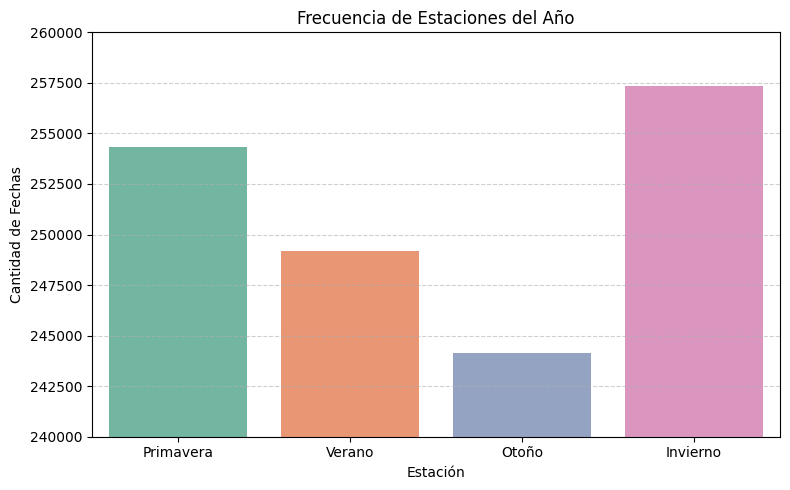

In [ ]:
# Función para asignar estación del año
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    elif month in [9, 10, 11]:
        return 'Otoño'
    else:
        return 'Invierno'

# Aplicar la función a la columna DATE
df['ESTACION'] = df['DATE'].apply(get_season)

# Contar ocurrencias y ordenarlas
conteo_estaciones = df['ESTACION'].value_counts().reindex(['Primavera', 'Verano', 'Otoño', 'Invierno'])

# Preparar el DataFrame para el gráfico
df_plot = conteo_estaciones.reset_index()
df_plot.columns = ['Estacion', 'Frecuencia']

# Graficar sin advertencia
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='Estacion', y='Frecuencia', hue='Estacion', palette='Set2', dodge=False)

plt.title('Frecuencia de Estaciones del Año')
plt.xlabel('Estación')
plt.ylabel('Cantidad de Fechas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.ylim(240000,260000)
plt.savefig("hipotesis_1.png")
plt.show()  

#### HIPÓTESIS 2  

"Se cometen más crímenes por la noche 🌙." 

Vemos que cuando se cometen más delitos es por la tarde, no por la noche.

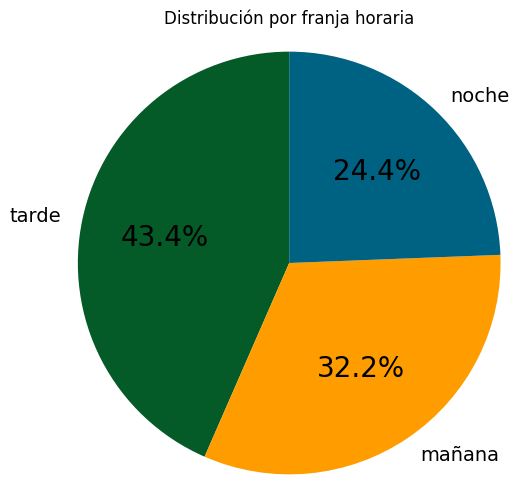

In [ ]:
# primero hay que clasificar cada hora en una franja
def clasificar_franja(t):
    if dt.time(6, 0) <= t < dt.time(14, 0):
        return 'mañana'
    elif dt.time(14, 0) <= t < dt.time(22, 0):
        return 'tarde'
    else:  # desde las 22:00 hasta las 6:00 (noche)
        return 'noche'

# Crear una nueva columna 'FRANJA'
df['FRANJA'] = df['TIME'].apply(clasificar_franja)

conteo_franjas = df['FRANJA'].value_counts()

# Opcional: para que los colores sean más representativos
colores = {'mañana': "#FF9D00", 'tarde': "#055B27", 'noche': "#006282"}

# Reordenar los colores según el orden en los datos
colors = [colores[franja] for franja in conteo_franjas.index]

# Gráfico de pastel
plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(conteo_franjas, 
        labels = conteo_franjas.index, 
        autopct = '%1.1f%%', 
        startangle = 90, 
        colors = colors,
        textprops={'fontsize': 14})

# Cambiar SOLO el tamaño del porcentaje interior
for autotext in autotexts:
    autotext.set_fontsize(20)

plt.title('Distribución por franja horaria')
plt.axis('equal')  # Para que sea un círculo
plt.savefig("hipotesis_2.png")
plt.show()

#### HIPÓTESIS 3  

"Se cometen más crímeres los fines de semana 🌳." 

Vemos que efectivamente se comenten más crímenes los fines de semana, sobre todo los viernes.

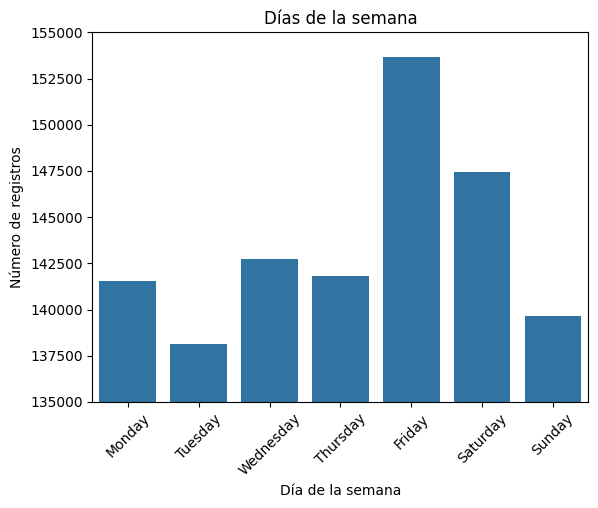

DAY WEEK
Monday       0.140840
Tuesday      0.137454
Wednesday    0.142006
Thursday     0.141106
Friday       0.152913
Saturday     0.146726
Sunday       0.138955
Name: proportion, dtype: float64


In [ ]:
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# asegurar que la columna 'DAY WEEK' sea categórica y tenga el orden deseado
df['DAY WEEK'] = pd.Categorical(df['DAY WEEK'], categories = sorted_days, ordered=True)

sns.countplot(data = df, x = 'DAY WEEK', order = sorted_days)
plt.title('Días de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.ylim(135000,155000)
plt.savefig("hipotesis_3.png")
plt.show()

print(df['DAY WEEK'].value_counts(normalize=True).reindex(sorted_days))

#### HIPÓTESIS 4   

"¿Hay relación entre fines de semana y la edad de la víctima? 🌳🙍"  

Vemos que el grueso de edad sigue siendo entre los 30-45 años de edad y tenemos muchos outliers.


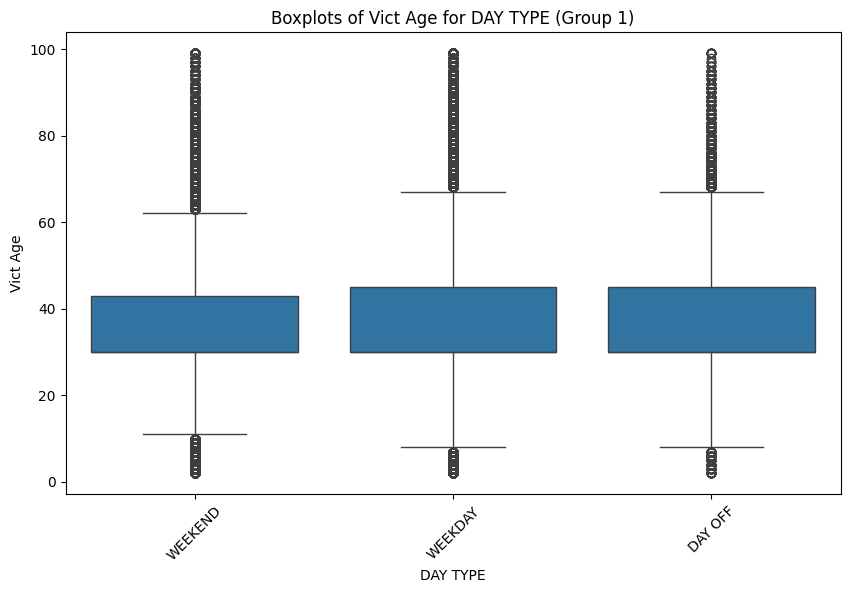

In [ ]:
def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.savefig("hipotesis_4.png")
        plt.show()

plot_grouped_boxplots(df,"DAY TYPE","Vict Age")

#### HIPÓTESIS 5   

"Las víctimas suelen ser mujeres ♀️."

Los hombres suelen ser más suceptibles de sufrir delitos.

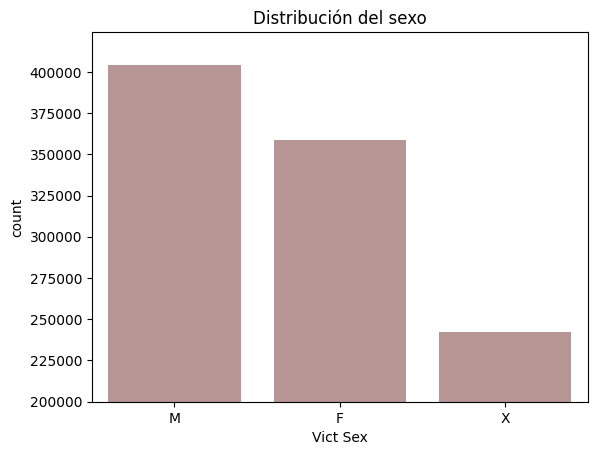

Vict Sex
M    0.401874
F    0.356799
X    0.241327
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data = df, x = 'Vict Sex', color='rosybrown')
plt.title('Distribución del sexo')
plt.ylim(200000,)
plt.savefig("hipotesis_5.png")
plt.show()

print(df['Vict Sex'].value_counts(normalize=True))

In [ ]:
# OTRA FORMA DE REPRESENTAR LA GRÁFICA:

# pinta_distribucion_categoricas(df,["Vict Sex"], relativa= True, mostrar_valores= True)

# print(df['Vict Sex'].value_counts(normalize=True))

#### HIPÓTESIS 6    

"El crimen que mas se repite es el robo 🔪."

Hemos acertado en el que el delito más común es el robo, en este caso, de vehículos.

In [ ]:
# calculo los 20 delitos más comunes
top10 = df['Crm Cd Desc'].value_counts().head(10)

# crear DataFrame para Plotly
df_top10 = top10.reset_index()
df_top10.columns = ['Tipo de delito', 'Frecuencia']

# crear gráfico interactivo de barras horizontales
fig = px.bar(
    df_top10,
    x='Frecuencia',
    y='Tipo de delito',
    orientation='h',
    title='Top 10 delitos más comunes',
    color_discrete_sequence=["#b4781f"]
)

# invertir el eje Y para que el delito más frecuente esté arriba
fig.update_layout(yaxis=dict(autorange='reversed'))
plt.savefig("hipotesis_6.png")
fig.show()

<Figure size 640x480 with 0 Axes>

Por último, vamos a representar el mapa de las zonas más calientes de delitos en Los Ángeles.

In [ ]:
# dataframe con LAT y LON
df_map = df[['LAT', 'LON']].copy()
df_map = pd.DataFrame(df_map)
df_map = df_map.head(10000)

# crear el mapa
fig = px.scatter_mapbox(df_map,
                        lat="LAT",
                        lon="LON",
                        zoom=10,
                        center={"lat": 34.068, "lon": -118.41},  # Los Ángeles city centre
                        height=1000)

# estilo de mapa (no requiere token)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Coordenadas en Los Ángeles")
fig.write_html("mapa_1.html")
fig.show()

Representemos los puntos de los delitos en un mapa, veamos dos formas:

In [ ]:
# dataframe con LAT y LON
df_map = df[['LAT', 'LON']].copy()
df_map = pd.DataFrame(df_map)
df_map = df_map.head(100)

# mapa de Los Ángeles
map = folium.Map(location=[34.06, -118.41], zoom_start=10)

# marcadores sin texto
for _, row in df_map.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# guardar como archivo HTML
map.save("mapa_2.html")